In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28)
(10000, 28, 28) (10000,)


In [3]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

print(y_train[0])
y_train_one_hot[0]

9


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [4]:
classes = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot' ]


Text(0.5, 1.0, 'ankle boot')

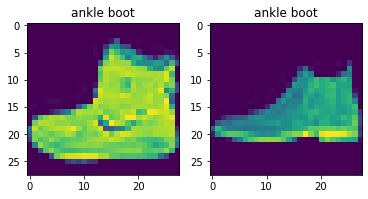

In [5]:
# plotting to test correct label

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(x_train[0])
ax.set_title('{}'.format(classes[y_train[0]]))

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(x_test[0])
ax.set_title('{}'.format(classes[y_test[0]]))

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
x_train = x_train / 255
y_train = y_train / 255

x_train.dtype, x_train[0] 

(dtype('float64'),
 array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.  

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
# add noise
# random noise form normal distribution with mean at 0 and std dev of 1
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# clipping the values less than 0 and larger than 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

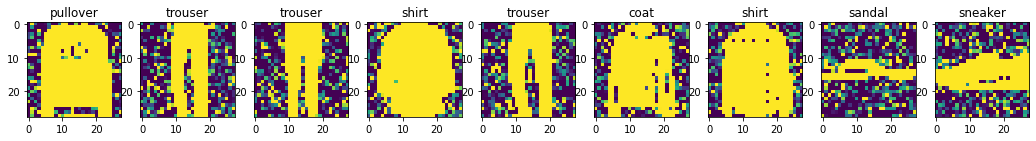

In [10]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    ax.set_title('{}'.format(classes[y_test[i]]))
    plt.imshow(x_test_noisy[i])
plt.show()

In [11]:
def build_model():
    return models.Sequential([
        # first convolution layer
        layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(2,2, padding='same'),
        #second convolution layer
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(2,2, padding='same'),
        #thrid convolution layer
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(2,2, padding='same'),
        #fourth convolution layer
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(2,2, padding='same'),
        #flatten the results to feed into DNN
        layers.Flatten(),
        #512 neuorn hidden layers
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation="softmax"),
    ])

In [12]:
model = build_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [14]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), 
              metrics='accuracy')

In [14]:
history = model.fit(x_train, y_train_one_hot, epochs=100, verbose=1, steps_per_epoch=32)

Epoch 1/100
32/32 [==============================] - 41s 71ms/step - loss: 2.2675 - accuracy: 0.1653
Epoch 2/100
32/32 [==============================] - 2s 70ms/step - loss: 1.9352 - accuracy: 0.4856
Epoch 3/100
32/32 [==============================] - 2s 72ms/step - loss: 1.7089 - accuracy: 0.4316
Epoch 4/100
32/32 [==============================] - 2s 73ms/step - loss: 0.8633 - accuracy: 0.6697
Epoch 5/100
32/32 [==============================] - 2s 71ms/step - loss: 0.6890 - accuracy: 0.7428
Epoch 6/100
32/32 [==============================] - 2s 70ms/step - loss: 0.6295 - accuracy: 0.7685
Epoch 7/100
32/32 [==============================] - 3s 83ms/step - loss: 0.5914 - accuracy: 0.7825
Epoch 8/100
32/32 [==============================] - 2s 71ms/step - loss: 0.5722 - accuracy: 0.7881
Epoch 9/100
32/32 [==============================] - 2s 71ms/step - loss: 0.5395 - accuracy: 0.8041
Epoch 10/100
32/32 [==============================] - 2s 71ms/step - loss: 0.5245 - accuracy: 0.808

In [16]:
model.save("original_mnist.h5")

In [21]:
# plotting model history(accuracy and loss)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [19]:
from keras.models import load_model
model = load_model("original_mnist.h5")



NameError: name 'history' is not defined

In [22]:
results = model.evaluate(x_test, y_test_one_hot, batch_size=128)
print("test loss, test acc:", results)

79/79 [==============================] - 21s 8ms/step - loss: 45.4992 - accuracy: 0.8886
test loss, test acc: [45.49922561645508, 0.8885999917984009]


In [35]:
# testing image with random
def test_image(model, x, y):
    plt.figure(figsize = (1,1)) # sizing figure to be small
    random_index = np.random.randint(0, 10001) # random number from 0 to 10000
    one_hot_label_list = model.predict(x)[random_index]
    label_index = tf.argmax(one_hot_label_list, axis=0) #decoding to find index
    plt.imshow(x[random_index])
    plt.xlabel(classes[label_index])

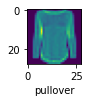

In [36]:
test_image(model, x_test, y_test_one_hot)


In [37]:
noisy_model = build_model()

In [38]:
noisy_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), 
              metrics='accuracy')
noisy_model_history = model.fit(x_train_noisy, y_train_one_hot, epochs=100, verbose=1, steps_per_epoch=32)

Epoch 1/100
32/32 [==============================] - 6s 67ms/step - loss: 2.9844 - accuracy: 0.1950
Epoch 2/100
32/32 [==============================] - 2s 67ms/step - loss: 1.4595 - accuracy: 0.4608
Epoch 3/100
32/32 [==============================] - 2s 67ms/step - loss: 0.9611 - accuracy: 0.6325
Epoch 4/100
32/32 [==============================] - 2s 67ms/step - loss: 0.8704 - accuracy: 0.6666
Epoch 5/100
32/32 [==============================] - 2s 67ms/step - loss: 0.8321 - accuracy: 0.6832
Epoch 6/100
32/32 [==============================] - 2s 68ms/step - loss: 0.8166 - accuracy: 0.6867
Epoch 7/100
32/32 [==============================] - 2s 67ms/step - loss: 0.7895 - accuracy: 0.6999
Epoch 8/100
32/32 [==============================] - 2s 68ms/step - loss: 0.7714 - accuracy: 0.7067
Epoch 9/100
32/32 [==============================] - 2s 67ms/step - loss: 0.7590 - accuracy: 0.7096
Epoch 10/100
32/32 [==============================] - 2s 68ms/step - loss: 0.7588 - accuracy: 0.7095

32/32 [==============================] - 2s 68ms/step - loss: 0.5548 - accuracy: 0.7879
Epoch 83/100
32/32 [==============================] - 2s 68ms/step - loss: 0.5513 - accuracy: 0.7892
Epoch 84/100
32/32 [==============================] - 2s 68ms/step - loss: 0.5512 - accuracy: 0.7900
Epoch 85/100
32/32 [==============================] - 2s 66ms/step - loss: 0.5501 - accuracy: 0.7904
Epoch 86/100
32/32 [==============================] - 2s 67ms/step - loss: 0.5503 - accuracy: 0.7895
Epoch 87/100
32/32 [==============================] - 2s 69ms/step - loss: 0.5478 - accuracy: 0.7904
Epoch 88/100
32/32 [==============================] - 2s 67ms/step - loss: 0.5462 - accuracy: 0.7907
Epoch 89/100
32/32 [==============================] - 2s 66ms/step - loss: 0.5486 - accuracy: 0.7898
Epoch 90/100
32/32 [==============================] - 2s 67ms/step - loss: 0.5527 - accuracy: 0.7883
Epoch 91/100
32/32 [==============================] - 2s 69ms/step - loss: 0.5454 - accuracy: 0.7916
Epo

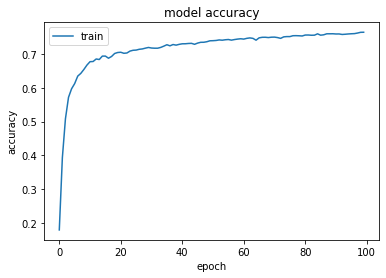

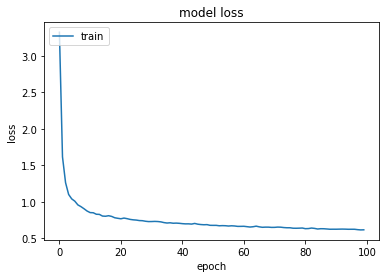

In [22]:
# plotting noisy model history(accuracy and loss)
# summarize noisy model history for accuracy
plt.plot(noisy_model_history.history['accuracy'])
plt.title('Noisy model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize nosiy model history for loss
plt.plot(noisy_model_history.history['loss'])
plt.title('Noisy model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [39]:
noisy_model.save("noisy_model.h5")
noisy_model = load_model("noisy_model.h5")

In [38]:
noisy_model_results = noisy_model.evaluate(x_test_noisy, y_test_one_hot, batch_size=128)
print("noisy model test loss, test acc:", noisy_model_results)

79/79 [==============================] - 1s 7ms/step - loss: 2.3023 - accuracy: 0.1111
noisy model test loss, test acc: [2.302342653274536, 0.11110000312328339]


[Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss')]

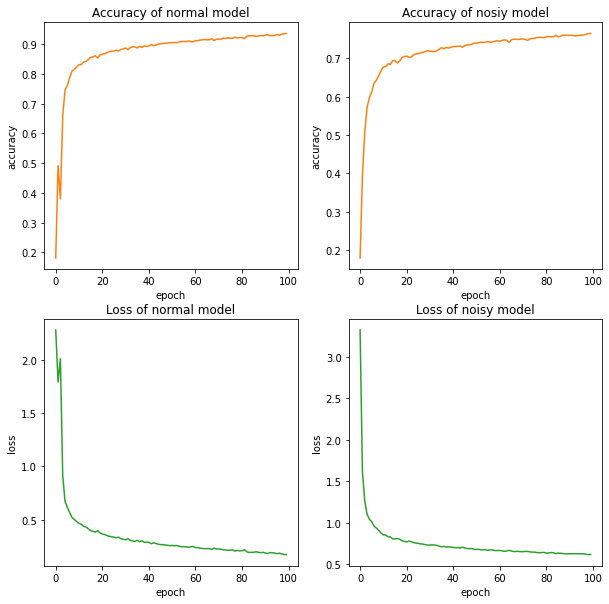

In [36]:
## compairing plots between two models

fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(10)
axs[0, 0].plot(history.history['accuracy'], 'tab:orange')
axs[0, 0].set_title('Accuracy of normal model')
axs[0, 0].set(xlabel='epoch', ylabel="accuracy")

axs[0, 1].plot(noisy_model_history.history['accuracy'], 'tab:orange')
axs[0, 1].set_title('Accuracy of nosiy model')
axs[0, 1].set(xlabel='epoch', ylabel="accuracy")

axs[1, 0].plot(history.history['loss'], 'tab:green')
axs[1, 0].set_title('Loss of normal model')
axs[1, 0].set(xlabel='epoch', ylabel="loss")

axs[1, 1].plot(noisy_model_history.history['loss'], 'tab:green')
axs[1, 1].set_title('Loss of noisy model')
axs[1, 1].set(xlabel='epoch', ylabel="loss")


tf.Tensor(8, shape=(), dtype=int64)


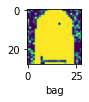

In [42]:
test_image(noisy_model, x_test_noisy, y_test_one_hot)